# 2020a_BFNQG
This notebook, associated to the configuration file *config_2020a_BFNQG.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2020a_BFNQG'

In [2]:
import sys
sys.path.append('../..')

In [3]:
from src import exp
config = exp.Exp(path_config)

name_experiment: 2020a_BFNQG
saveoutputs: True
name_exp_save: 2020a_BFNQG
path_save: outputs/2020a_BFNQG
tmp_DA_path: scratch/2020a_BFNQG
init_date: 2012-10-01 00:00:00
final_date: 2012-12-15 00:00:00
assimilation_time_step: 3:00:00
saveoutput_time_step: 3:00:00
flag_plot: 0
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
write_obs: False
compute_obs: False
path_obs: None

NAME_OBSOP is not set in the configuration file
NAME_BASIS is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)


super: GRID_GEO
lon_min: 295.0
lon_max: 305.0
lat_min: 33.0
lat_max: 43.0
dlon: 0.1
dlat: 0.1
name_init_mask: None
name_var_mask: {'lon': '', 'lat': '', 'var': ''}



## Observations

In [5]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

Observation information will be saved in dict_obs_J1_EN_TPN_G2_20121001_20121215_295_305_33_43.txt

J1:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_jason1.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var_mdt: None
nudging_params_ssh: {'sigma': 0, 'K': 0.7, 'Tau': datetime.timedelta(days=1)}
detrend: False

--> 92 tracks selected

EN:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_envisat.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var_mdt: None
nudging_params_ssh: {'sigma': 0, 'K': 0.7, 'Tau': datetime.timedelta(days=1)}
detrend: False

--> 79 tracks selected

TPN:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_topex-poseidon_interleaved.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SS

## Model

In [6]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_QG1L_NP
name_var: {'SSH': 'ssh', 'PV': 'pv'}
name_init_var: {}
dir_model: None
var_to_save: None
dtmodel: 600
upwind: 3
upwind_adj: None
Reynolds: False
qgiter: 20
qgiter_adj: None
c0: 2.7
filec_aux: None
name_var_c: {'lon': '', 'lat': '', 'var': ''}
cmin: None
cmax: None
only_diffusion: False
path_mdt: None
name_var_mdt: {'lon': '', 'lat': '', 'mdt': '', 'mdu': '', 'mdv': ''}
g: 9.81



## Boundary conditions

In [7]:
from src import bc as bc
Bc = bc.Bc(config)

super: BC_EXT
file: data/2020a_SSH_mapping_NATL60_DUACS_en_j1_tpn_g2.nc
name_lon: lon
name_lat: lat
name_time: time
name_var: {'SSH': 'gssh'}
dist_sponge: 50

<xarray.Dataset>
Dimensions:  (lat: 162, lon: 394, time: 365)
Coordinates:
  * lat      (lat) float64 26.88 27.12 27.38 27.62 ... 66.38 66.62 66.88 67.12
  * lon      (lon) float64 -90.12 -89.88 -89.62 -89.38 ... 7.625 7.875 8.125
  * time     (time) datetime64[ns] 2012-10-01 2012-10-02 ... 2013-09-30
Data variables:
    gssh     (time, lat, lon) float64 dask.array<chunksize=(365, 162, 394), meta=np.ndarray>


## Inversion

In [8]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Bc=Bc)

super: INV_BFN
window_size: 7 days, 0:00:00
window_output: 3 days, 0:00:00
propagation_timestep: 3:00:00
window_overlap: True
criterion: 0.001
max_iteration: 20
save_trajectory: False
dist_scale: 10
save_obs_proj: False
path_save_proj: None
use_bc_as_init: False
scalenudg: None

Loop from 2012-10-01 to 2012-10-08 : 13 iterations in 0:09:07.191779 seconds
Loop from 2012-10-02 to 2012-10-09 : 13 iterations in 0:08:53.555041 seconds
Loop from 2012-10-04 to 2012-10-11 : 7 iterations in 0:04:32.733749 seconds
Loop from 2012-10-05 to 2012-10-12 : 13 iterations in 0:08:49.643916 seconds
Loop from 2012-10-07 to 2012-10-14 : 7 iterations in 0:04:38.114647 seconds
Loop from 2012-10-08 to 2012-10-15 : 7 iterations in 0:04:35.746742 seconds
Loop from 2012-10-10 to 2012-10-17 : 9 iterations in 0:06:04.501882 seconds
Loop from 2012-10-11 to 2012-10-18 : 11 iterations in 0:07:29.477746 seconds
Loop from 2012-10-13 to 2012-10-20 : 7 iterations in 0:04:41.113764 seconds
Loop from 2012-10-14 to 2012-10-

## Diagnostics

In [5]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSSE
dir_output: diags/2020a_BFNQG
time_min: 2012-10-22 00:00:00
time_max: 2012-12-04 00:00:00
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: data/dc_ref/NATL60-CJM165_GULFSTREAM*.nc
name_ref_time: time
name_ref_lon: lon
name_ref_lat: lat
name_ref_var: sossheig
options_ref: {'combine': 'nested', 'concat_dim': 'time', 'parallel': True}
name_exp_var: ssh
compare_to_baseline: True
name_bas: data/2020a_SSH_mapping_NATL60_DUACS_en_j1_tpn_g2.nc
name_bas_time: time
name_bas_lon: lon
name_bas_lat: lat
name_bas_var: gssh



In [6]:
Diag.regrid_exp()

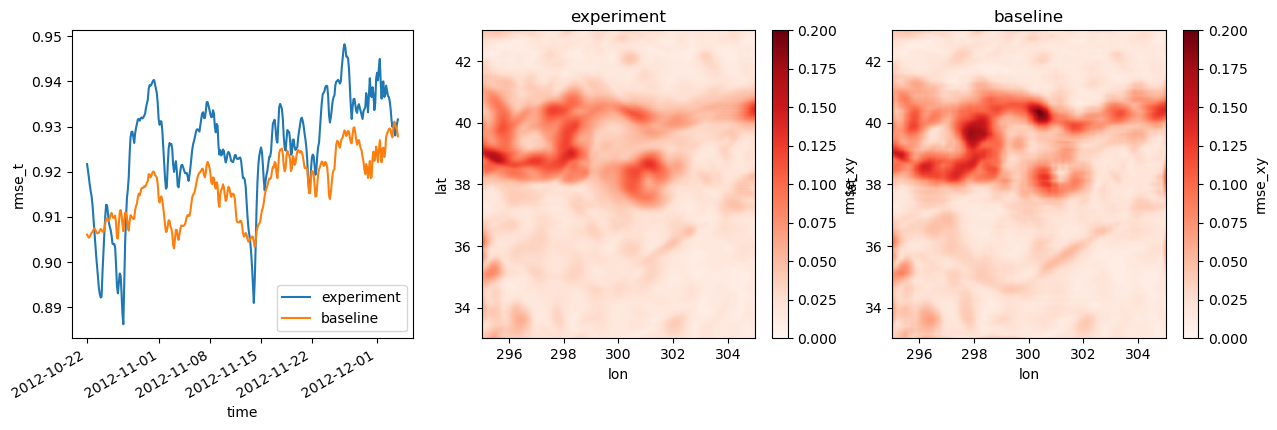

In [7]:
Diag.rmse_based_scores(plot=True)

/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


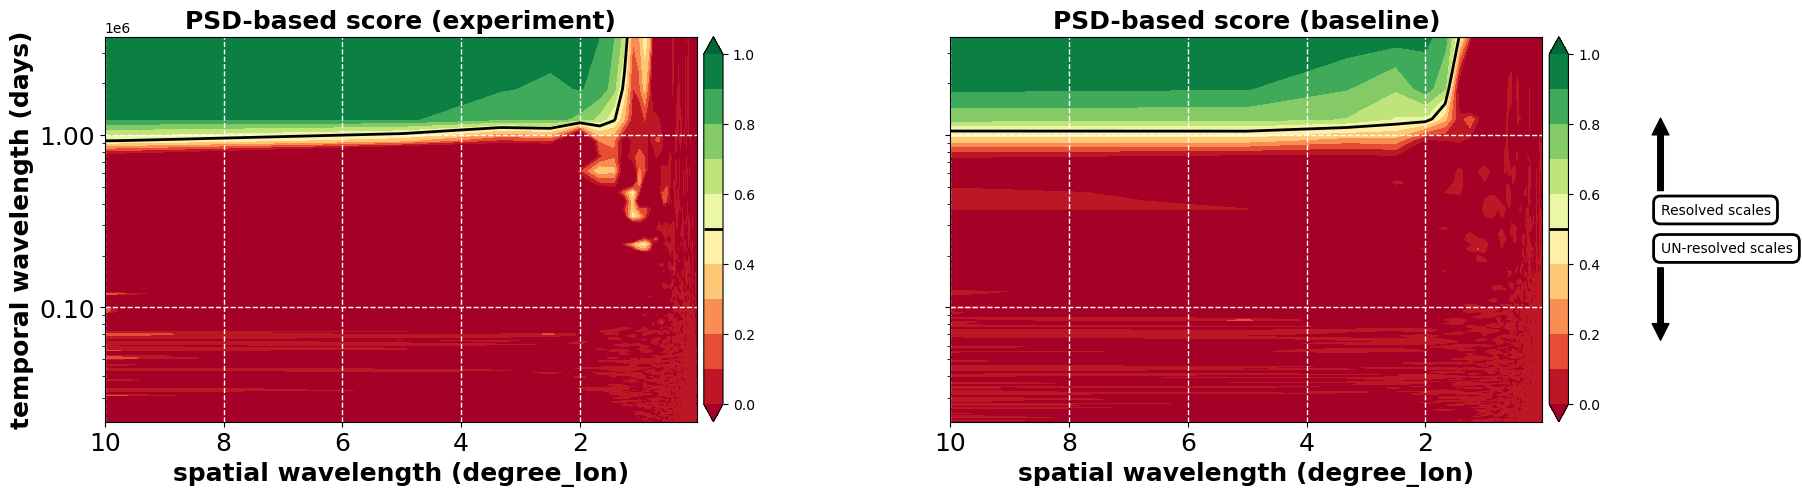

In [8]:
Diag.psd_based_scores(plot=True)

In [9]:
Diag.movie(framerate=12)

ffmpeg -f image2 -r 12 -pattern_type glob -i diags/2020a_BFNQG/frame_*.png -y -c:v libx264 -preset veryslow -crf 15 -pix_fmt yuv420p -r 12 diags/2020a_BFNQG/movie.mp4


ffmpeg version 9c33b2f Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/home/fleguillou/anaconda3 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3. 

In [10]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [11]:
Leaderboard = Diag.Leaderboard()
Leaderboard

,Method,µ(RMSE),σ(RMSE),λx (degree),λt (days)
0,2020a_BFNQG,0.92,0.01,1.20,10.71
1,baseline,0.92,0.01,1.43,12.18
